In [ ]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cashe -fv
!rm ~/.cache/matplotlib -rf
# 순서 : 마운트초기화 > 폰트설치 > 런타임다시시작 > 구글드라이브 마운트 > 나머지 코드...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
my_path='/content/notebooks'

os.symlink('.content/drive/My Drive/Colab Notebooks',my_path)
sys.path.insert(0,my_path)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
import os
path = '/content/drive/MyDrive/1차프로젝트/data'
file_list = ['경쟁사이용.txt', '고객DEMO.txt', '멤버십여부.txt', '상품분류.txt', '채널이용.txt']
Ldata = {}

for file in file_list:
  data = pd.read_csv(f'{path}/{file}',encoding='cp949') # 경로에 있는 파일 데이터프레임으로 불러오기
  data_name = file.replace('.txt', '') # 사전형 데이터로 만들기 위해 키값으로 삼을 파일명 생성
  Ldata[data_name] = data

dt_parser = lambda x: datetime.datetime.strptime(x, "%Y%m%d")
Ldata['구매상품'] = pd.read_csv('/content/drive/MyDrive/1차프로젝트/data/구매상품TR.txt',encoding='CP949', parse_dates=['구매일자'], date_parser=dt_parser)

In [ ]:
Ldata.keys()

In [ ]:
print('< NULL 개수 >')
for i in Ldata.keys():
    null = Ldata[i].isnull().sum()
    null_colname = null[null>0].index
    null_count = null[null>0].values
    if len(null_count) ==0 :
        null_colname = 'X'
        null_count = ''
    print(f'{i} - {null_colname[0]} {null_count}')

In [ ]:
Ldata['고객DEMO']

In [ ]:
고객 = Ldata['고객DEMO'].거주지역[Ldata['고객DEMO'].거주지역.isnull()==True].index
거주지미표기고객번호 = Ldata['고객DEMO'].iloc[고객,[0,3]]
거주지미표기고객번호

# 각 테이블 출력

In [ ]:
Ldata.keys()

In [ ]:
# 1. 경쟁사이용
Ldata['경쟁사이용']
# Ldata['경쟁사이용'] # 하아... 윗줄이랑 같은데 얜 안나옴..

,고객번호,제휴사,경쟁사,년,월
0,2,D,D02,2015,7
1,51,D,D01,2015,4
2,77,D,D02,2015,3
3,77,D,D02,2015,6
4,77,D,D02,2015,7
...,...,...,...,...,...
28154,19375,B,B01,2015,1
28155,19375,B,B01,2015,7
28156,19375,C,C03,2015,11
28157,19376,B,B01,2015,6


In [ ]:
# 2. 고객DEMO
Ldata['고객DEMO']

,고객번호,성별,연령대,거주지역
0,1,M,60세이상,60.0
1,2,M,60세이상,100.0
2,3,M,60세이상,33.0
3,4,F,60세이상,16.0
4,5,M,60세이상,100.0
...,...,...,...,...
19378,19379,F,20세~24세,69.0
19379,19380,F,20세~24세,39.0
19380,19381,F,40세~44세,460.0
19381,19382,F,45세~49세,460.0


In [ ]:
# 2. 멤버십여부
Ldata['멤버십여부']

,고객번호,멤버십명,가입년월
0,11,하이마트,201512
1,21,하이마트,201506
2,37,하이마트,201306
3,43,하이마트,201403
4,44,하이마트,201411
...,...,...,...
7451,19377,롭스,201411
7452,19379,롭스,201412
7453,19380,롭스,201412
7454,19381,다둥이,201506


In [ ]:
# 3. 상품분류
Ldata['상품분류']

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
0,A,1,101,A010101,일용잡화,위생세제
1,A,1,101,A010102,일용잡화,휴지류
2,A,1,101,A010103,일용잡화,뷰티상품
3,A,1,101,A010104,일용잡화,일용잡화
4,A,1,101,A010105,일용잡화,세트상품
...,...,...,...,...,...,...
4381,D,8,802,D080204,아이메이크업,아이섀도우
4382,D,8,802,D080205,아이메이크업,메이크업세트
4383,D,8,803,D080301,립메이크업,립스틱/립라이너
4384,D,8,803,D080302,립메이크업,립글로즈/틴트


In [ ]:
# 4. 채널이용
Ldata['채널이용']

,고객번호,제휴사,이용횟수
0,7,A_MOBILE/APP,4
1,14,A_MOBILE/APP,1
2,42,B_MOBILE/APP,23
3,74,A_MOBILE/APP,1
4,74,B_MOBILE/APP,30
...,...,...,...
8819,19168,C_ONLINEMALL,18
8820,19291,C_ONLINEMALL,1
8821,19312,B_ONLINEMALL,137
8822,19351,C_ONLINEMALL,19


In [ ]:
# 5. 구매상품
Ldata['구매상품']

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매시간,구매금액,년,월,일,분기,주차,구매시간대,성별,연령대,거주지역,분류 체계,중분류명,소분류명
0,B,8664000,15,1504,B150401,17218,44,20,2420,2014,2,22,1,4,저녁,F,50세~54세,100.0,식품,탄산음료,사이다
1,B,8747265,15,1504,B150401,17218,44,10,970,2015,6,27,2,4,새벽&오전,F,50세~54세,100.0,식품,탄산음료,사이다
2,B,8720725,15,1504,B150401,17218,44,17,1280,2015,1,29,1,4,오후,F,50세~54세,100.0,식품,탄산음료,사이다
3,B,8725005,15,1504,B150401,17218,44,18,1380,2015,2,24,1,4,저녁,F,50세~54세,100.0,식품,탄산음료,사이다
4,B,8748478,15,1504,B150401,17218,44,15,980,2015,7,4,3,1,오후,F,50세~54세,100.0,식품,탄산음료,사이다
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,C,1073027,3,303,C030312,18710,75,12,7990,2015,1,22,1,4,오후,F,50세~54세,540.0,식품,근채류,기타한방약재
28593026,C,8635424,17,1701,C170121,12323,281,18,5340,2014,5,23,2,4,저녁,F,45세~49세,100.0,일상용품,주방용품,보온도시락
28593027,C,985626,17,1702,C170221,1608,63,18,3900,2014,12,11,4,2,저녁,F,55세~59세,500.0,일상용품,청소욕실용품,욕실수납용품
28593028,C,7570422,17,1705,C170530,18188,255,22,23800,2014,8,2,3,1,밤,F,40세~44세,570.0,전문스포츠/레저,레저취미,기타탁구용품


In [ ]:
Ldata['구매상품'].소분류코드.value_counts()

In [ ]:
# 1-1 고객당 이용 회수
고객당이용회수 = Ldata['경쟁사이용'].고객번호.value_counts()
고객당이용회수

In [ ]:
import pandas as pd
df = pd.DataFrame(고객당이용회수)
df1 = df.reset_index()
plt.rc('font', family='NanumBarunGothic') # 한글처리해주기위한거
df1.columns = ['고객번호', '이용횟수']
df1

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,5))
sns.barplot(x='고객번호', y='이용횟수', data=df1, orient='v')

#### 고객번호로 데이터를 합칠 수 있는지 보기위해서 고객번호가 포함된 데이터 테이블을 점검
- 경쟁사이용_df
- 고객DEMO_df
- 멤버십_df
- 채널이용_df

In [ ]:
Ldata.keys()

In [ ]:
list(Ldata.keys())[0]
Ldata['경쟁사이용'].info()

In [ ]:
# def 년월일분해(테이블명,컬럼명):
#   Ldata[f'{테이블명}']['년']=Ldata[f'{테이블명}'][f'{컬럼명}'].dt.year
#   Ldata[f'{테이블명}']['월']=Ldata[f'{테이블명}'][f'{컬럼명}'].dt.month
#   Ldata[f'{테이블명}']['일']=Ldata[f'{테이블명}'][f'{컬럼명}'].dt.day
#   Ldata[f'{테이블명}'] = Ldata[f'{테이블명}'].drop(f'{컬럼명}', axis=1)
#   return Ldata[f'{테이블명}']

# Ldata[list(Ldata.keys())[0]]
Ldata['경쟁사이용']['년'] = pd.to_datetime(Ldata['경쟁사이용']['이용년월'] , format='%Y%m').dt.year
Ldata['경쟁사이용']['월'] = pd.to_datetime(Ldata['경쟁사이용']['이용년월'] , format='%Y%m').dt.month
Ldata['경쟁사이용'] = Ldata['경쟁사이용'].drop('이용년월', axis=1)
Ldata['경쟁사이용']

In [ ]:
# 각 파일마다 고객번호 중복 최대값
for file in list(Ldata.keys()):
  print(file, Ldata[file].iloc[:,0].value_counts().max())
# #     print(j.고객번호.value_counts())
# 각 테이블당 겹체는 고객번호의 개수를 세봣더니 1개를 초과하고 각각의 파일마다 개수가 다른걸 봐서는 단순합치기는 불가상태

In [ ]:
# 년월일 분류
Ldata['구매상품']['년']=Ldata['구매상품'].구매일자.dt.year
Ldata['구매상품']['월']=Ldata['구매상품'].구매일자.dt.month
Ldata['구매상품']['일']=Ldata['구매상품'].구매일자.dt.day
Ldata['구매상품'] = Ldata['구매상품'].drop('구매일자', axis=1)
Ldata['구매상품']

# 분기별로 데이터 분리 분석(년/월/일/계절별 + 시간대별)

In [ ]:
# 분기별로 데이터 분리 분석(년/월/일/계절별 + 시간대별)
# 분기 : 1.봄, 2.여름, 3.가을, 4.겨울
# 같이 고민할 부분 1년을 기준으로 1 2 3 4 분기를 나눌것인지 12 1 2, 3 4 5, 6 7 8, 9 10 11 이렇게 계절로 나눠야할 것인지
# 기준정보 논의 1. 분기or계절, 2.월초,월중,월말, 3.시간분류 낮 밤 아침 새벽 or 낮,밤 or 아침,점심,저녁 몇시를 기준으로 할지
def month_quarter(x):
  q = 0
  if x <=3: q = 1
  elif x <=6: q = 2
  elif x <=9: q = 3
  elif x <=12: q = 4
  return q

def day_parts(x):
  q = 0
  if x <=7: q = '1'
  elif x <=14: q = '2'
  elif x <=21: q = '3'
  else : q = '4'
  return q

# 고려대학교 정보 보호대학원 빅데이터 응용 및 보안학과
# 유통채널 소비분석(대형마트 소비 감소를 중심으로) 논문에 나온 시간분류 참고.
def time_parts(x):
  q = 0
  if x <=10: q = '새벽&오전'
  elif x <=17: q = '오후'
  elif x <=20: q = '저녁'
  else : q = '밤'
  return q

Ldata['구매상품']['분기'] = Ldata['구매상품']['월'].apply(lambda x : month_quarter(x))
Ldata['구매상품']['주차'] = Ldata['구매상품']['일'].apply(lambda x : day_parts(x))
Ldata['구매상품']['구매시간대'] = Ldata['구매상품']['구매시간'].apply(lambda x : time_parts(x))
Ldata['구매상품']

In [ ]:
Ldata['구매상품']['소분류코드'].value_counts()

In [ ]:
# 분류체계 파일 불러오기
df = pd.read_csv('/content/drive/MyDrive/1차프로젝트/cakd3_1차프로젝트_2조/상품분류.csv')
df

In [ ]:
# # 로컬파일불러오기
# from google.colab import files
# upload = files.upload()
# import io
# df = pd.read_csv(io.StringIO(upload['상품분류.csv'].decode('utf-8')))

In [ ]:
df=df[['소분류코드', '분류 체계', '중분류명', '소분류명']]
df

In [ ]:
df1 = pd.merge(Ldata['구매상품'], Ldata['고객DEMO'],on='고객번호',how='outer')
df2 = pd.merge(df1, df, on='소분류코드', how='outer')
Ldata['구매상품'] = df2
Ldata['구매상품'].head()

In [ ]:
# 피클로 파일 저장
import pickle
with open("/content/drive/MyDrive/1차프로젝트/cakd3_1차프로젝트_2조/Ldata0920.pkl", "wb") as tf: pickle.dump(Ldata,tf)

####  쓰시는 분은 여기부터 하시면 됩니다. 
### 위에 작업들을 피클 파일로 저장해서 구글공유폴더에 넣어놨고
####  아래에 피클파일 불러오기 코드가 있으니 그냥 아래 코딩을 실행시키면 됩니다.
 - 참고사항 :  Ldata가 통합 파일인데 딕셔너리 상태로 되있어요
 - 데이터 형태가 Ldata {'경쟁사이용':데이터프레임, '고객DEMO':데이터프레임, '멤버십여부':데이터프레임, '상품분류':데이터프레임, '채널이용':데이터프레임, '구매상품':데이터프레임])
 - 이런 형태로 되어있으니 각각의 데이터 프레임을 보실땐 Ldata['구매상품'], Ldata['경쟁사이용'] 이렇게 Ldata에 key값을 입력한 형태로 사용하시면 됩니다.

In [ ]:
print(Ldata.keys())

In [ ]:
# 피클파일 불러오기
import pickle
with open("/content/drive/MyDrive/cakd3_1차프로젝트_2조/dataset/Ldata0920.pkl", "rb") as tf: Ldata = pickle.load(tf)

In [ ]:
Ldata.keys()

dict_keys(['경쟁사이용', '고객DEMO', '멤버십여부', '상품분류', '채널이용', '구매상품'])

In [ ]:
data=Ldata['구매상품']

In [ ]:
def quarter_parts(x):
  q = 0
  if x <= 2:
    q = '상반기'
  else :
    q = '하반기'
  return q

data['상/하반기'] = data['분기'].apply(lambda x : quarter_parts(x))
data.head()

In [ ]:
a=data.dropna()


In [ ]:
def 지역명변환(i):
  cat = 0
  if i <= 9:
    cat = '서울'
  elif i <= 20:
    cat = '경기'
  elif i <= 23:
    cat = '인천'
  elif i <= 26:
    cat = '강원'
  elif i <= 29:
    cat = '충북'
  elif i == 30:
    cat = '세종'
  elif i <= 33:
    cat = '충남'
  elif i <= 35:
    cat = '대전'
  elif i <= 40:
    cat = '경북'
  elif i <= 43:
    cat = '대구'
  elif i <= 45:
    cat = '울산'
  elif i <= 49:
    cat = '부산'
  elif i <= 53:
    cat = '경남'
  elif i <= 56:
    cat = '전북'
  elif i <= 60:
    cat = '전남'
  elif i <= 62:
    cat = '광주'
  elif i == 60:
    cat = '제주'
  return cat

In [ ]:
a['지역'] = Ldata['구매상품']['거주지역'].apply(lambda x :지역명변환(x/10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
b=a.groupby('지역').count()
b = b.reset_index()

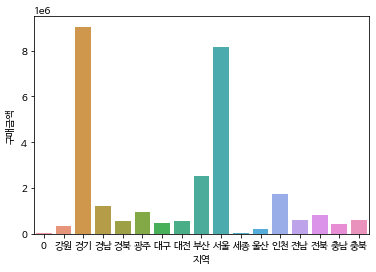

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic',size=10)
sns.barplot(x='지역', y='구매금액', data=b, orient='v')

In [ ]:
## 2014년 상반기, 2014년 하반기, 2015년 상반기에 지속적인 하락을 보이는 고객 / 2015년 하반기 ->검증 데이터

c=Ldata['구매상품'].groupby(['고객번호','분기']).agg({'구매금액':'sum','소분류명':'count'})
c

In [ ]:
df = data.groupby(['고객번호','년','상/하반기']).agg({'구매금액':'sum', '소분류명':'count'})
df1 = df.reset_index(2)
df1.head(10)
df1 = df1.reset_index(1)
df1
#df1.groupby('년')
# df1 = df1.groupby(['고객번호','년']).sum()
# df1.reset_index()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77197 entries, 1 to 19383
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년       77197 non-null  int64 
 1   상/하반기   77197 non-null  object
 2   구매금액    77197 non-null  int64 
 3   소분류명    77197 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.9+ MB


In [ ]:
df1['년']=df1['년'].astype(str)
df1['신분기']=df1['년']+df1['상/하반기']
df1 = df1.reset_index()

In [ ]:
import pandas as pd

df2 = pd.pivot_table(df1,values = '구매금액', aggfunc='sum',index='고객번호',columns ='신분기')
df2=df2.fillna(0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df2_scaled = scaler.fit_transform(df2)
df2_scaled

array([[1.43448219e-02, 2.55095418e-02, 1.71228251e-02, 1.04994156e-02],
       [1.75109754e-02, 1.63916524e-02, 2.65873937e-02, 2.07093787e-02],
       [6.12813550e-04, 7.79541319e-04, 5.66616382e-04, 5.44196325e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 2.67596899e-03, 2.59910603e-03],
       [0.00000000e+00, 0.00000000e+00, 1.74758601e-03, 2.06344706e-03],
       [0.00000000e+00, 0.00000000e+00, 2.58300843e-05, 1.88905082e-03]])

In [ ]:
df3_scaled=pd.DataFrame(df2_scaled)
df3_scaled['증감1']=df3_scaled[1]-df3_scaled[0]
df3_scaled['증감2']=df3_scaled[2]-df3_scaled[1]

In [ ]:
df3=df3_scaled[['증감1','증감2']]
df3

,증감1,증감2
0,0.011165,-0.008387
1,-0.001119,0.010196
2,0.000167,-0.000213
3,-0.000447,0.000315
4,-0.002267,0.001144
...,...,...
19378,0.000890,0.001402
19379,0.000391,0.000411
19380,0.000000,0.002676
19381,0.000000,0.001748


In [ ]:
df4=df3.query('증감1<0 & 증감2<0')
df4

,증감1,증감2
17,-0.035265,-0.007008
50,-0.000019,-0.001333
53,-0.000165,-0.000003
73,-0.002519,-0.002389
95,-0.003759,-0.001654
...,...,...
19279,-0.000085,-0.000028
19295,-0.000162,-0.000017
19309,-0.007322,-0.005326
19322,-0.000405,-0.000147


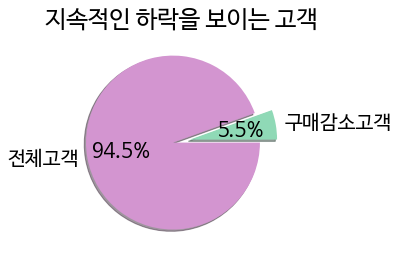

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic',size=20)
ratio = [1129 ,19383 ]
labels = ['구매감소고객', '전체고객']
explode = [0.10, 0.10]
colors = ['#8fd9b6', '#d395d0']

plt.pie(ratio, labels=labels, autopct='%.1f%%', explode=explode, colors=colors,shadow=True)
plt.title('지속적인 하락을 보이는 고객')
plt.show()

In [ ]:
Ldata['멤버십여부'][Ldata['멤버십여부'].고객번호==13894]

In [ ]:
Ldata['멤버십여부']

In [ ]:
# 고객별 맴버십 가입현황
import pandas as pd
pv = pd.pivot_table(Ldata['멤버십여부'],values='가입년월', index='고객번호', columns = '멤버십명')
pv = pv.reset_index()
pv

In [ ]:
Ldata['구매상품']

In [ ]:
# ['고객DEMO', '구매상품', '상품분류', 멤버십여부] 합친 테이블
# 이 테이블의 단점은 고객별로 테이블을 생성할때 계산이 복잡해질 수 있어서 추 후에 합치는것도 고려를 해봐야 할듯함
import pandas as pd
ddff = pd.merge(Ldata['구매상품'], pv, on='고객번호', how='outer')
ddff

In [ ]:
# 중간정리
# 전체 데이터 : ['경쟁사이용', '고객DEMO', '멤버십여부', '상품분류', '채널이용', '구매상품']
# 적용 데이터 : ['고객DEMO', '구매상품', '상품분류']
# 추가 데이터 : ['경쟁사이용', '멤버십여부', '채널이용']

In [ ]:
df = Ldata['구매상품'][['영수증번호', '고객번호', '구매시간', '구매금액', '년', '분기', '주차', '구매시간대', '성별', '연령대', '거주지역', '분류 체계']]
df
# a = Ldata['구매상품'].groupby(['년', '분기', '주차', '성별','연령대','거주지역','분류 체계'])
# a

In [ ]:
# 연령대를 테이블에 너무 빨리 합친것 같다. (통계를 낼때 연령대 고려가 힘듬) 연령대, 거주지역은 최빈값으로 계산해야할거 같음.
# 경쟁사이용, 멤버십, 채널이용, 고겍데모는 한테이블로 합칠 수 있을거같다